In [28]:
import pandas as pd
import numpy as np
import scipy.constants as sc
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [8]:
df = pd.read_excel(r"coefficient2.xlsx")
new_df = pd.DataFrame({"Frequency": df.loc[1:, 'Unnamed: 0'].apply(lambda x:float(x))}, index=range(1,11))

In [9]:
k = sc.value(u"Boltzmann constant")  # Boltzman constant in J/K
h = sc.value(u"Planck constant")           # Planck's Constant in J/Hz
f = df.loc[1:,"Unnamed: 0"].apply(lambda x:float(x))*10**12     # Frequency in Hz
n_skin = df.loc[1:, "skin"].apply(lambda x:float(x))    # refractive index for skin
a_skin = df.loc[1:, "skin.1"].apply(lambda x:float(x))  # absorption coefficient for skin
d = 1 * 10**(-3)             # Distance in meter

# Background Noise by Planck's Function
planck_func = [((2*sc.pi*h*(f[i])**3)/((sc.c)**2))*1/(np.exp((h*f[i])/(k*310))) for i in range(1,len(f)+1)]

# Background Noise power spectral density
bg_noise_skin = ((planck_func)*(sc.c/4*sc.pi*f*n_skin)**2).apply(lambda x:float(x))

# Noise on skintissue medium
noise_skin = (bg_noise_skin*(1-np.exp(-(a_skin*d*10**3))) * (sc.c/4*sc.pi*n_skin*f*d)**2).apply(lambda x:float(x))   

# molecular absorption noise for skin
abs_noise_skin = bg_noise_skin + noise_skin

In [10]:
new_df["Skin (Refractive Index, n)"] = df.loc[1:,"skin"].apply(lambda x:float(x))
new_df["Skin (Absorption Coefficient, \u03B1)"] = df.loc[1:,"skin.1"].apply(lambda x:float(x))
new_df["Fat (Refractive Index, n)"] = df.loc[1:,"Fat"].apply(lambda x:float(x))
new_df["Fat (Absorption Coefficient, \u03B1)"] = df.loc[1:,"Fat.1"].apply(lambda x:float(x))
new_df["Plank's Function B(T,f)"] = planck_func
new_df["Background Noise power spectral density S(f) for Skin"] = bg_noise_skin
new_df["Noise S_s(d,f) for Skin"] = noise_skin
new_df["Molecular absorption noise S_N(d,f) for Skin"] = abs_noise_skin

In [11]:
noise = []
for i in range(1, len(a_skin)+1):
    func = lambda  freq:(k*310* (1-np.exp(-a_skin[i]*d*10**3))* (sc.c/(np.sqrt(4*sc.pi)*freq))**2)
    val, err = quad(func,0, planck_func[i-1])
    noise.append(val)

<ipython-input-11-531a5140f34e>:4: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  val, err = quad(func,0, planck_func[i-1])


In [12]:
noise_dB = [-10*np.log10(-noise[i]) for i in range(len(noise))]     # Noise in dB
new_df["Noise Power P_N in dB"] = noise_dB
new_df.to_excel("noise_data.xlsx")
new_df

,Frequency,"Skin (Refractive Index, n)","Skin (Absorption Coefficient, α)","Fat (Refractive Index, n)","Fat (Absorption Coefficient, α)","Plank's Function B(T,f)",Background Noise power spectral density S(f) for Skin,"Noise S_s(d,f) for Skin","Molecular absorption noise S_N(d,f) for Skin",Noise Power P_N in dB
1,0.2,2.487803,7.240005,2.0305,4.0489,3.592837e-16,4.931177e+24,6.763198e+58,6.763198e+58,-109.301274
2,0.4,2.246139,9.490481,1.9319,5.8964,2.786637e-15,1.247082e+26,5.580543e+60,5.580543e+60,-100.407632
3,0.6,2.165657,11.736955,1.8659,8.0317,9.118161e-15,8.535132e+26,7.989319e+61,7.989319e+61,-95.259658
4,0.8,2.111387,14.240531,1.8101,10.0315,2.095446e-14,3.314463e+27,5.242634e+62,5.242634e+62,-91.645998
5,1.0,2.065012,16.846053,1.7649,11.7077,3.967889e-14,9.380497e+27,2.217646e+63,2.217646e+63,-88.873170
6,1.2,2.023375,19.394905,1.7295,13.0432,6.647468e-14,2.172664e+28,7.101151e+63,7.101151e+63,-86.632203
7,1.4,1.986050,21.781510,1.7021,14.0876,1.023410e-13,4.386392e+28,1.880032e+64,1.880032e+64,-84.758269
8,1.6,1.952969,23.951465,1.6809,14.8994,1.481080e-13,8.017339e+28,4.339923e+64,4.339923e+64,-83.152981
9,1.8,1.923947,25.887087,1.6644,15.5355,2.044509e-13,1.359382e+29,9.038453e+64,9.038453e+64,-81.752875
10,2.0,1.898668,27.593195,1.6514,16.0376,2.719033e-13,2.173669e+29,1.737691e+65,1.737691e+65,-80.514620





----------Start----------


Please Enter the frequency: 1


Please Enter the Refractive Index
according to your given frequency: 1.9013


Please Enter the Absorption Coefficient
according to your given frequency: 23.1726


<ipython-input-55-d476ecc1eeee>:25: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  val, err = quad(func,0, planck_func)




----------Please Choose the medium according to your Data----------


S for Skin tissue
B for Blood tissue
F for fat tissue: b


Please Enter the frequency: 1


Please Enter the Refractive Index
according to your given frequency: 2.065012069


Please Enter the Absorption Coefficient
according to your given frequency: 16.84605294


----------Please Choose the medium according to your Data----------


S for Skin tissue
B for Blood tissue
F for fat tissue: s


Please Enter the frequency: 1


Please Enter the Refractive Index
according to your given frequency: 1.7649


Please Enter the Absorption Coefficient
according to your given frequency: 11.7077


----------Please Choose the medium according to your Data----------


S for Skin tissue
B for Blood tissue
F for fat tissue: f


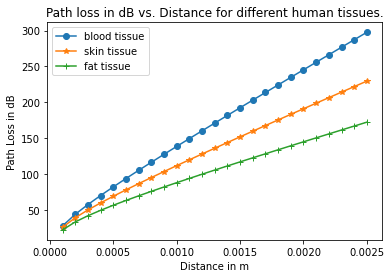

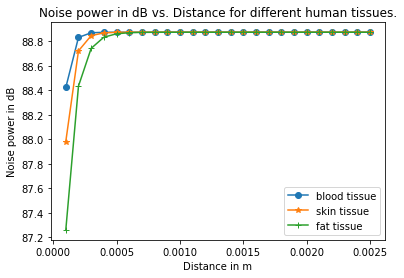

In [55]:
class IntraBody:
    def __init__(self, distance, frequency, ref_index, abs_coeff):
        self.distance = distance      # In mm
        self.frequency = frequency * 10**12             # In Hz
        self.ref_index = ref_index
        self.abs_coeff = abs_coeff
    
    def pathLoss(self):
        path_loss_dm = []
        for i in range(len(self.distance)):
            spreading = np.square(4*np.pi*self.frequency*self.ref_index*self.distance[i]*10**(-3) / sc.c)
            absn = np.exp(self.abs_coeff * self.distance[i])
            path_loss = spreading * absn
            path_loss_dm.append((10*np.log10(path_loss)))
        return path_loss_dm
    
    def noise_power(self):
        k = sc.value(u"Boltzmann constant")        # Boltzman constant in J/K
        h = sc.value(u"Planck constant")           # Planck's Constant in J/Hz
        temp = 310   # in Kelvin
        planck_func = ((2*sc.pi*h*self.frequency**3)/((sc.c)**2))/(np.exp((h*self.frequency)/(k*temp)))
        noise = []
        for i in range(len(self.distance)):
            func = lambda  freq:(-k*temp* (1-np.exp(-self.abs_coeff* self.distance[i]))* (sc.c/(np.sqrt(4*sc.pi)*freq))**2)
            val, err = quad(func,0, planck_func)
            noise.append(10*np.log10(val))
        return noise

def main():
    print("\n\n\n----------Start----------")
    
    distance = np.arange(0.1,(2.5+0.1),0.1)
    
    skin_path = []
    skin_noise = []
    
    blood_path = []
    blood_noise = []
    
    fat_path = []
    fat_noise = []
    
    for i in range(3):
        frequency = float(input("\n\nPlease Enter the frequency: "))
        ref_index = float(input("\n\nPlease Enter the Refractive Index\naccording to your given frequency: "))
        abs_coeff = float(input("\n\nPlease Enter the Absorption Coefficient\naccording to your given frequency: "))
        b = IntraBody(distance, frequency, ref_index,abs_coeff)
        path_loss = b.pathLoss()
        noise_power = b.noise_power()
        
        ### Medium Confirmation
        print("\n\n----------Please Choose the medium according to your Data----------")
        medium = input("\n\nS for Skin tissue\nB for Blood tissue\nF for fat tissue: ")
        
        if medium.upper() == "S":
            for j in range(len(path_loss)):
                skin_path.append(path_loss[j])
                skin_noise.append(noise_power[j])

        elif medium.upper() == "B":
            for k in range(len(path_loss)):
                blood_noise.append(noise_power[k])
                blood_path.append(path_loss[k])

        elif medium.upper() == "F":
            for l in range(len(path_loss)):
                fat_noise.append(noise_power[l])
                fat_path.append(path_loss[l])

        else:
            raise Exception("\n\nSorry! You entered a wrong input.\nPlease be sure and try again.")
            
#     print('Skin Path -->',skin_path)
#     print('Skin Noise -->',skin_noise)
#     print('Blood Path -->',blood_path)
#     print('Blood Noise -->',blood_noise)
#     print('Fat Path -->',fat_path)
#     print('Fat Noise -->',fat_noise)
        
    
    plt.plot(distance*10**(-3), blood_path, 'o-', label='blood tissue')
    plt.plot(distance*10**(-3), skin_path, '*-', label='skin tissue')
    plt.plot(distance*10**(-3), fat_path, '+-', label='fat tissue')
    plt.xlabel("Distance in m")
    plt.ylabel("Path Loss in dB")
    plt.title("Path loss in dB vs. Distance for different human tissues.")
    plt.legend()
    plt.show()
    
    plt.plot(distance*10**(-3), blood_noise, 'o-', label='blood tissue')
    plt.plot(distance*10**(-3), skin_noise, '*-', label='skin tissue')
    plt.plot(distance*10**(-3), fat_noise, '+-', label='fat tissue')
    plt.xlabel("Distance in m")
    plt.ylabel("Noise power in dB")
    plt.title("Noise power in dB vs. Distance for different human tissues.")
    plt.legend()
    
    plt.show()

if __name__ == '__main__':
    main()
        

In [42]:
distance = np.arange(0.1,(2.5+0.1),0.1)

In [45]:
len(distance)

25